# LP3 Group B Assignment 1

## Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.

### Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [1]:
#Importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
df = pd.read_csv('uber.csv') #Reading CSV file
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.dtypes #Checking Datatypes.

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [ ]:
df.isnull().sum() #Checking for Null Values.

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [ ]:
df.drop(['Unnamed: 0','key'],axis=1,inplace=True) #Dropping first coloumnn as it is irrelevant.
df.dropna(axis=0,inplace=True) #Dropping the rows with null values.
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
def haversine (lon_1, lon_2, lat_1, lat_2): #Function to find the distance using the coordinates
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2]) #Converting Degrees to Radians
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    distance = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2+np.cos(lat_1)*np.cos(lat_2)*np.sin(diff_lon/2.0)**2)) #Calculationg the Distance using Haversine Formula
    return distance

df['Distance']= haversine(df['pickup_longitude'],df['dropoff_longitude'],df['pickup_latitude'],df['dropoff_latitude'])
df['Distance'] = df['Distance'].astype(float).round(2) #Rounding-off to 2 decimals
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48


Text(0, 0.5, 'fare_amount')

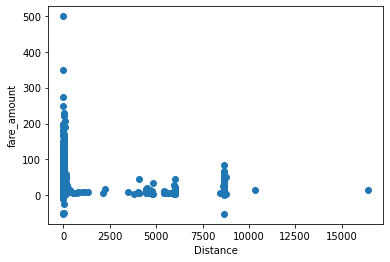

In [ ]:
#Plotting a scatter plot to check for outliers.
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

Text(0, 0.5, 'fare_amount')

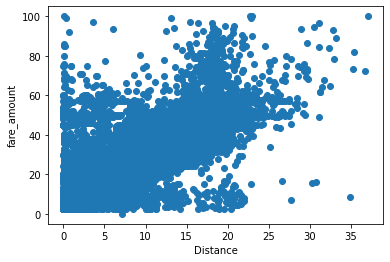

In [ ]:
#Dealing with Outliers via removing rows with too large Distance and 0 or lesser distance.
df.drop(df[df['Distance']>60].index, inplace=True)
df.drop(df[df['Distance']==0].index, inplace=True)
df.drop(df[df['Distance']<0].index, inplace=True)
#Dealing with Outliers via removing rows with 0 or lesser fare amounts.
df.drop(df[df['fare_amount']==0].index, inplace=True)
df.drop(df[df['fare_amount']<0].index, inplace=True)
#Dealing with Outliers via removing rows with non-plausible fare amounts and distance travelled.
df.drop(df[df['Distance']>100].index, inplace=True)
df.drop(df[df['fare_amount']>100].index, inplace=True)
df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index, inplace = True )
df.drop(df[(df['fare_amount']<100) & (df['Distance']>100)].index, inplace = True )
#Plotting a Scatter Plot to check for any more outliers and also to show correlation between Fare Amount and Distance.
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [ ]:
#Preprocessing the Data Using Standard Scaler in range of -1 to 1
x = df['Distance'].values.reshape(-1, 1)        #Independent Variable
y = df['fare_amount'].values.reshape(-1, 1)     #Dependent Variable
std = StandardScaler()
Y = std.fit_transform(y)
X = std.fit_transform(x)
#Splitting the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
def apply_model(model): #Model to print the metrics of the various prediction models
    model.fit(X_train,Y_train)
    print("Training score = ",model.score(X_train,Y_train))
    print("Testing score = ",model.score(X_test,Y_test))
    print("Accuracy = ",model.score(X_test,Y_test))
    Y_pred = model.predict(X_test)
    print("Predicted values:\n",Y_pred)
    print("Mean Absolute Error =", metrics.mean_absolute_error(Y_test, Y_pred))
    print("Mean Squared Error =", metrics.mean_squared_error(Y_test, Y_pred))
    print("Root Mean Squared Error =", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

In [ ]:
lr = LinearRegression()
apply_model(lr)

Training score =  0.8023890708990102
Testing score =  0.800134921063358
Accuracy =  0.800134921063358
Predicted values:
 [[-0.0856421 ]
 [ 1.40250073]
 [ 0.1072653 ]
 ...
 [-0.17833787]
 [-0.42636167]
 [-0.37124527]]
Mean Absolute Error = 0.243543639885431
Mean Squared Error = 0.19732734085539588
Root Mean Squared Error = 0.44421542167668593


In [ ]:
#Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=10)
apply_model(rf)

C:\Users\candr\AppData\Local\Temp\ipykernel_7216\3813684645.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


Training score =  0.8250567049453948
Testing score =  0.7931312012692804
Accuracy =  0.7931312012692804
Predicted values:
 [-0.10304075  1.80284551  0.08764113 ... -0.21391608 -0.42011423
 -0.37785255]
Mean Absolute Error = 0.24703500001737674
Mean Squared Error = 0.20424213262599705
Root Mean Squared Error = 0.4519315574575392
